In [1]:
import pandas as pd
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt

In [2]:
path = "../data/CRU/"
fname = "mexico_cru_ts4.05.1901.2020.pre.dat.nc"

# Se carga la precipitación.
with xr.load_dataset(path + fname) as pre_xr:
    # Se recorta la zona de estudio.
    pre_xr = pre_xr[dict(lat = slice(10, 12), lon = slice(39, 41))]
    # Se promedia espacialmente y se retira stn, que no se requiere.
    pre_df = pre_xr.mean(dim = "lat").mean(
        dim = "lon").to_dataframe().drop("stn", axis = 1)

In [3]:
# Se seleccionan los datos a partir de 1979.
pre_df = pre_df[pre_df.index > "1979"]
# Se suman los valores para cada mes.
pre_df = pre_df.resample("M").sum()
# Se obtienen los nombres de los meses.
pre_df["Mes"] = pre_df.index.month_name("es_MX")
# Se cambia el formato del índice para que no incluya el día.
pre_df.index = pre_df.index.to_period("M")

pre_xr.close()

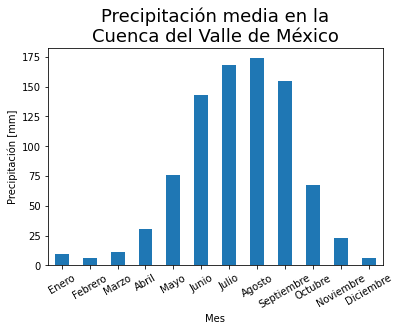

In [4]:
# Se grafica el promedio mensual.
pre_df.groupby(pre_df.index.month).mean().plot.bar(legend = None)

# Se configura la gráfica.
plt.xlabel("Mes")
plt.ylabel("Precipitación [mm]")
plt.title(
    "Precipitación media en la\nCuenca del Valle de México",
    {'fontsize': 18}
    )
plt.xticks(range(0,12), pre_df.Mes[0:12], rotation=30)

# Se muesta la gráfica.
plt.show()